TensorFlow Decision Forests v1.3.0
TensorFlow v2.12.0
clinical dataset shape:   (2615, 8)
proteins dataset shape:   (232741, 5)
peptides dataset shape:   (981834, 6)


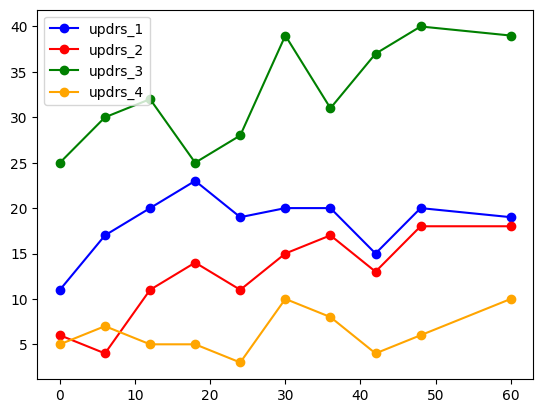

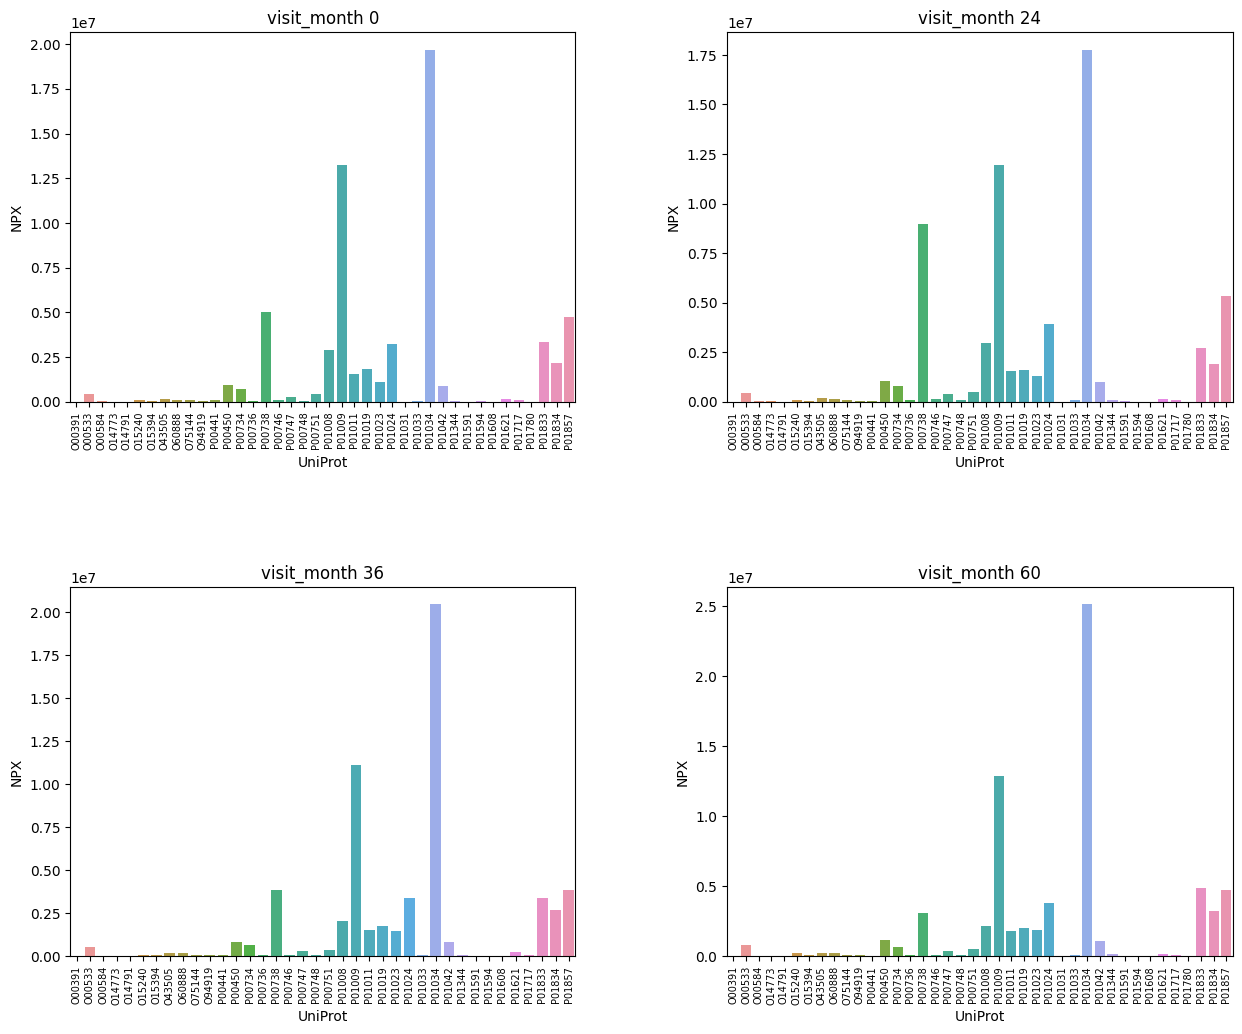

860 examples in training, 208 examples in testing.


2023-05-07 14:36:21.853967: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
[INFO 23-05-07 14:36:22.1115 EDT kernel.cc:1242] Loading model from path /var/folders/6j/tgb081b50n99wmbtnv2pqkx00000gn/T/tmpdddc1qx9/model/ with prefix d3b57ab19a014cf0
[INFO 23-05-07 14:36:22.2617 EDT decision_forest.cc:660] Model loaded with 300 root(s), 80024 node(s), and 5 input feature(s).
[INFO 23-05-07 14:36:22.2618 EDT abstract_model.cc:1312] Engine "RandomForestOptPred" built
[INFO 23-05-07 14:36:22.2618 EDT kernel.cc:1074] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 22ms/step
864 examples in training, 204 examples in testing.


[INFO 23-05-07 14:36:23.5762 EDT kernel.cc:1242] Loading model from path /var/folders/6j/tgb081b50n99wmbtnv2pqkx00000gn/T/tmpm19y97zb/model/ with prefix c29f5b64dce343dc
[INFO 23-05-07 14:36:23.6827 EDT decision_forest.cc:660] Model loaded with 300 root(s), 77198 node(s), and 5 input feature(s).
[INFO 23-05-07 14:36:23.6827 EDT kernel.cc:1074] Use fast generic engine


1/1 [==============================] - 0s 18ms/step
832 examples in training, 226 examples in testing.


[INFO 23-05-07 14:36:24.0708 EDT kernel.cc:1242] Loading model from path /var/folders/6j/tgb081b50n99wmbtnv2pqkx00000gn/T/tmp8rxc1bo2/model/ with prefix 7ef4c1fc5d3946d2
[INFO 23-05-07 14:36:24.1753 EDT decision_forest.cc:660] Model loaded with 300 root(s), 73080 node(s), and 5 input feature(s).
[INFO 23-05-07 14:36:24.1754 EDT kernel.cc:1074] Use fast generic engine


1/1 [==============================] - 0s 20ms/step
459 examples in training, 110 examples in testing.
1/1 [==============================] - 0s 15ms/step


[INFO 23-05-07 14:36:24.5008 EDT kernel.cc:1242] Loading model from path /var/folders/6j/tgb081b50n99wmbtnv2pqkx00000gn/T/tmph1tg975n/model/ with prefix 5fe0282589ac4fb6
[INFO 23-05-07 14:36:24.5537 EDT decision_forest.cc:660] Model loaded with 300 root(s), 34586 node(s), and 5 input feature(s).
[INFO 23-05-07 14:36:24.5538 EDT kernel.cc:1074] Use fast generic engine


label updrs_1: mse 21.8530
label updrs_2: mse 27.0606
label updrs_3: mse 148.0236
label updrs_4: mse 8.9398

Average mse 51.46925115585327
label updrs_1: sMAPE 61.8949
label updrs_2: sMAPE 93.2224
label updrs_3: sMAPE 70.4782
label updrs_4: sMAPE 145.1974

Average sMAPE 92.69822391398785


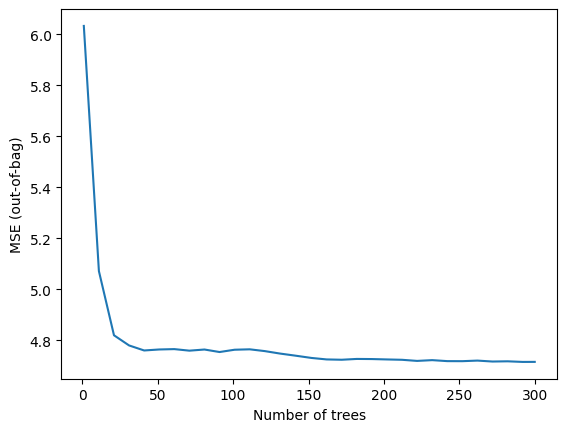

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


[("TSNE_1_protein" (1; #3), 156.0),
 ("TSNE_0_protein" (1; #1), 86.0),
 ("TSNE_0_peptide" (1; #0), 33.0),
 ("visit_month" (1; #5), 17.0),
 ("TSNE_1_peptide" (1; #2), 8.0)]

In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
import xgboost as xgb
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, LSTM, concatenate

print("TensorFlow Decision Forests v" + tfdf.__version__)
print("TensorFlow v" + tf.__version__)

# Load a dataset into a Pandas DataFrame
train_proteins = pd.read_csv("train_proteins.csv")
train_peptides = pd.read_csv("train_peptides.csv")
train_clinical = pd.read_csv("train_clinical_data.csv")

print('clinical dataset shape:  ', train_clinical.shape)

# Display the first 5 examples
train_clinical.head(5)

print('proteins dataset shape:  ', train_proteins.shape)


# Display the first 5 examples
train_proteins.head(5)

print('peptides dataset shape:  ', train_peptides.shape)


# Display the first 5 examples
train_peptides.head(5)

# Fetch data for patient with id 1517
plot_df = train_clinical[train_clinical["patient_id"]==1517]
fig, ax = plt.subplots(1, 1)

ax.plot(plot_df['visit_month'], plot_df['updrs_1'], marker='o', color="blue", label="updrs_1", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_2'], marker='o', color="red", label="updrs_2", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_3'], marker='o', color="green", label="updrs_3", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_4'], marker='o', color="orange", label="updrs_4", linestyle="-")

ax.legend()
plt.show()

pro_plot_df = train_proteins[train_proteins["patient_id"]==1517]
protein_list = pro_plot_df['UniProt'].unique()
protein_list = protein_list[:40]
pro_plot_df = pro_plot_df[pro_plot_df['UniProt'].isin(protein_list)]
unique_month = pro_plot_df['visit_month'].unique()
unique_month.sort()
p_len = len(unique_month)

pro_plot_df['visit_month'].unique()
n_rows = math.ceil(p_len/2)
figure, axis = plt.subplots(n_rows, 2, figsize=(15, n_rows*6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, month in enumerate(unique_month):
    row = i//2
    col = i % 2
    plot_df = pro_plot_df[pro_plot_df['visit_month']==month]
    bp = sns.barplot(ax=axis[row, col], x=plot_df['UniProt'], y=plot_df['NPX'])
    #bp.set(xticklabels=[])
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title('visit_month ' + str(month))
plt.show()

def prepare_dataset(train_proteins, train_peptides):
    # Step 1: Grouping 
    df_protein_grouped = train_proteins.groupby(['visit_id','UniProt'])['NPX'].mean().reset_index()
    df_peptide_grouped = train_peptides.groupby(['visit_id','Peptide'])['PeptideAbundance'].mean().reset_index()

    # Step 2: Pivoting
    df_protein = df_protein_grouped.pivot(index='visit_id', columns='UniProt', values='NPX').rename_axis(columns=None).reset_index()
    df_peptide = df_peptide_grouped.pivot(index='visit_id', columns='Peptide', values='PeptideAbundance').rename_axis(columns=None).reset_index()

    # Normalize the abundances using MinMaxScaler
    scaler = MinMaxScaler()
    df_protein.iloc[:, 1:] = scaler.fit_transform(df_protein.iloc[:, 1:])
    df_peptide.iloc[:, 1:] = scaler.fit_transform(df_peptide.iloc[:, 1:])

    # Impute missing values using KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    df_protein.iloc[:, 1:] = imputer.fit_transform(df_protein.iloc[:, 1:])
    df_peptide.iloc[:, 1:] = imputer.fit_transform(df_peptide.iloc[:, 1:])

    # Apply PowerTransformer
    power_transformer = PowerTransformer()
    df_protein.iloc[:, 1:] = power_transformer.fit_transform(df_protein.iloc[:, 1:])
    df_peptide.iloc[:, 1:] = power_transformer.fit_transform(df_peptide.iloc[:, 1:])

    # Apply t-SNE to reduce dimensionality
    tsne_protein = TSNE(n_components=2)
    tsne_peptide = TSNE(n_components=2)
    df_protein_tsne = pd.DataFrame(tsne_protein.fit_transform(df_protein.iloc[:, 1:]), index=df_protein.index)
    df_peptide_tsne = pd.DataFrame(tsne_peptide.fit_transform(df_peptide.iloc[:, 1:]), index=df_peptide.index)

    # Rename the columns using the original column names
    df_protein_tsne.columns = ['TSNE_' + str(col) + '_protein' for col in df_protein_tsne.columns]
    df_peptide_tsne.columns = ['TSNE_' + str(col) + '_peptide' for col in df_peptide_tsne.columns]

    # Concatenate the original data frames with the t-SNE-transformed data
    df_protein = pd.concat([df_protein['visit_id'], df_protein_tsne], axis=1)
    df_peptide = pd.concat([df_peptide['visit_id'], df_peptide_tsne], axis=1)

    # Step 3: Merging
    pro_pep_df = df_protein.merge(df_peptide, on=['visit_id'], how='left')

    return pro_pep_df

pro_pep_df = prepare_dataset(train_proteins, train_peptides)
pro_pep_df.columns = pro_pep_df.columns.astype(str)
pro_pep_df.shape

# Display the first 5 examples
pro_pep_df.head(5)


pro_pep_df.describe()

def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

tfdf.keras.get_all_models()

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# Create an empty dictionary to store the models trained for each label.
model_dict = {}

# Create an empty dictionary to store the mse score of the models trained for each label.
mse_dict = {}

# Create an empty dictionary to store the sMAPE scores of the models trained for each label.
smape_dict = {}

FEATURES = [i for i in pro_pep_df.columns if i not in ["visit_id"]]
FEATURES.append("visit_month")

# List of target labels to loop through and train models
target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

# Loop through each label   
for label in target:
    
    # Merge the label 'visit_id', 'patient_id', 'visit_month' and label columns from `train_clinical` 
    # data frame to `pro_prep_df` data frame on the `visit_id` column.
    dataset_df = pro_pep_df.merge(train_clinical[['visit_id', 'patient_id', 'visit_month', label]], on = ['visit_id'], how = 'left')
    
    # Drop null value label rows
    dataset_df = dataset_df.dropna(subset=[label])
    
    # Make a new copy of the FEATURES list we created previously. Add `label` to it.
    feature_list = FEATURES.copy() 
    feature_list.append(label)
    
    # Split the dataset into train and validation datasets.
    train_df, valid_df = split_dataset(dataset_df[feature_list])
    print("{} examples in training, {} examples in testing.".format(len(train_df), len(valid_df)))
 
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label, task = tfdf.keras.Task.REGRESSION)
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df, label=label, task = tfdf.keras.Task.REGRESSION)
    
    rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION, verbose=0)
    rf.compile(metrics=["mse"])
    
    # Train the model.
    rf.fit(x=train_ds)
    
    # Store the model
    model_dict[label] = rf

    # Evaluate the trained model on the validation dataset and store the 
    # mse value in the `mse_dict`.
    inspector = rf.make_inspector()
    inspector.evaluation()
    evaluation = rf.evaluate(x=valid_ds,return_dict=True)
    mse_dict[label] = evaluation["mse"]  
    
    # Use the trained model to make predictions on the validation dataset.
    # Using these predictions, calculate and store the sMAPE value for this model.
    preds = rf.predict(valid_ds)
    smape_dict[label] = smape(valid_df[label].values.tolist(), preds.flatten())

for name, value in mse_dict.items():
  print(f"label {name}: mse {value:.4f}")

print("\nAverage mse", sum(mse_dict.values())/4)
for name, value in smape_dict.items():
  print(f"label {name}: sMAPE {value:.4f}")

print("\nAverage sMAPE", sum(smape_dict.values())/4)

# Let us use the model for the label `updrs_1` for this purpose
tfdf.model_plotter.plot_model_in_colab(model_dict['updrs_1'], tree_idx=0, max_depth=3)

import matplotlib.pyplot as plt

# Let us use the model for the label `updrs_1` for this purpose
logs = model_dict['updrs_1'].make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("MSE (out-of-bag)")
plt.show()

# Let us use the model for the label `updrs_1` for this purpose
inspector = model_dict['updrs_1'].make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]